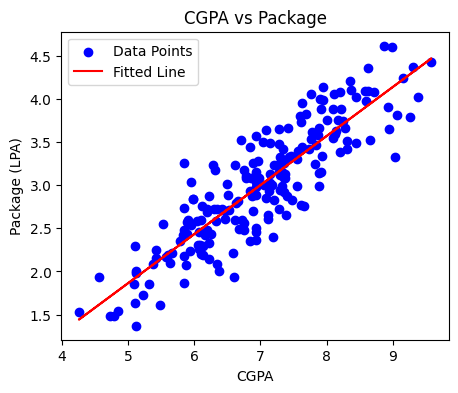

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import messagebox
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class SimpleLinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        """
        Fit the linear model to the data.
        X: Input features (numpy array of shape (n_samples, 1))
        y: Target values (numpy array of shape (n_samples,))
        """
        X = np.array(X).flatten()
        y = np.array(y)
        
        # Calculate the means of X and y
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate the numerator and denominator for the slope (beta)
        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        
        # Calculate coefficients
        self.slope = numerator / denominator
        self.intercept = y_mean - (self.slope * X_mean)

    def predict(self, X):
        """
        Predict target values for the given input features.
        X: Input features (numpy array of shape (n_samples, 1))
        """
        X = np.array(X).flatten()
        return self.slope * X + self.intercept

    def get_metrics(self, X, y):
        """
        Calculate and return regression metrics.
        X: Input features (numpy array of shape (n_samples, 1))
        y: Target values (numpy array of shape (n_samples,))
        """
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        return mse, mae, r2

# Load the dataset from a CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    X = df[['cgpa']].values
    y = df['package'].values
    return X, y

# Create the GUI
class LinearModelApp:
    def __init__(self, root):
        self.root = root
        root.title("CGPA to Package Prediction by Amaan Shaikh 211P052")

        # Load data
        csv_file_path = 'placement.csv'  # Update with your CSV file path
        self.X, self.y = load_data(csv_file_path)

        # Create and train the model
        self.model = SimpleLinearRegression()
        self.model.fit(self.X, self.y)

        # Calculate metrics
        self.mse, self.mae, self.r2 = self.model.get_metrics(self.X, self.y)

        # Create scatter plot
        self.fig, self.ax = plt.subplots(figsize=(5, 4))
        self.ax.scatter(self.X, self.y, color='blue', label='Data Points')
        self.ax.plot(self.X, self.model.predict(self.X), color='red', label='Fitted Line')
        self.ax.set_xlabel('CGPA')
        self.ax.set_ylabel('Package (LPA)')
        self.ax.set_title('CGPA vs Package')
        self.ax.legend()

        # Embed the plot in Tkinter
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.LEFT, padx=10, pady=10)

        # Create input box and button
        self.frame_right = tk.Frame(root)
        self.frame_right.pack(side=tk.RIGHT, padx=10, pady=10)

        self.label = tk.Label(self.frame_right, text="Enter CGPA:")
        self.label.pack()

        self.cgpa_entry = tk.Entry(self.frame_right)
        self.cgpa_entry.pack()

        self.predict_button = tk.Button(self.frame_right, text="Predict", command=self.predict)
        self.predict_button.pack()

        self.label_predicted = tk.Label(self.frame_right, text='Predicted Package:')
        self.label_predicted.pack()

        # Display metrics
        self.metrics_label = tk.Label(self.frame_right, text=f'MSE: {self.mse:.2f}\nMAE: {self.mae:.2f}\nR²: {self.r2:.2f}')
        self.metrics_label.pack(pady=10)

    def predict(self):
        try:
            # Get CGPA from entry box
            cgpa = float(self.cgpa_entry.get())

            # Predict package
            predicted_package = self.model.predict(np.array([[cgpa]]))[0]

            # Show result
            self.label_predicted.config(text=f"Predicted Package: {predicted_package:.2f} LPA")
        except ValueError:
            messagebox.showerror("Input Error", "Please enter a valid number for CGPA")

# Create the main window
if __name__ == "__main__":
    root = tk.Tk()
    app = LinearModelApp(root)
    root.mainloop()
